1. 原本 sharpe ratio法 在 **大俄羅斯** 跟 **中小基金** 的時候會比低檔投資法差
改sortino ratio之後記得再試試看
2. sharpe ratio的缺點是把上行波動(上漲的波動性)也算進來，但對投資人而言上漲的波動是好的
3. 把淨值做差分直到呈現穩態之後再做做看

In [1]:
import pandas as pd
import statistics
import datetime 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# 計算 Sortino 比率
def calculate_sortino(R,rf,sd_down): # 基金持有至目前報酬率 & 大盤報酬率 & 基金淨值下方標準差 
    sortino = (R-rf)/sd_down
    return sortino 
# 計算報酬率
def sell_return(today_nv, buy_nv, today_date, buy_date): # 計算賣出報酬率
    hold_days = (today_date - buy_date).days
    ret = (today_nv - buy_nv)/ buy_nv
    y_ret = ret/hold_days*365 # 年化報酬率
    return y_ret
def downDeviation(sqr_list):
    sum_sqr = 0

    for s in sqr_list:
        sum_sqr += s

    sd_down = (sum_sqr/ (len(sqr_list)-1))**0.5 # 平方和/(n-1)開根號

    return sd_down
def down_days(s_list):
    day = 0
    for i in range(len(s_list)):
        if(i>0):
            if s_list[i] < s_list[i-1]:
                day += 1
            else:
                break
    return day
  

In [3]:
# import data #
df_fund = pd.read_excel("基金資料.xlsx",sheet_name ="工作表9") 
df_fund['年月日'] = pd.to_datetime(df_fund['年月日'])
df_market = pd.read_excel("大盤資料.xlsx") #大盤資料，自行指定大盤指數
df_market['年月日'] = pd.to_datetime(df_market['年月日'])
df_merge = pd.merge(df_fund,df_market, on='年月日', how= 'left')

for i,item in df_merge.iterrows():
  if np.isnan(item['1M']):
     df_merge.loc[i,'1M'] = df_merge.loc[i-1,'1M']
  df_merge.loc[i,'1M'] = df_merge.loc[i,'1M'] / 3
pd.set_option('display.max_rows', None)
df_merge

,年月日,幣別,淨值(元),基金名稱,1M
0,2015-11-09,NTD,9.9999,野村美利高收債B,0.345000
1,2015-11-10,NTD,9.9996,NaN,0.344900
2,2015-11-11,NTD,10.0010,NaN,0.345733
3,2015-11-12,NTD,9.9938,NaN,0.344533
4,2015-11-13,NTD,9.9880,NaN,0.344667
5,2015-11-16,NTD,9.9881,NaN,0.346900
6,2015-11-17,NTD,10.0051,NaN,0.346067
7,2015-11-18,NTD,10.0026,NaN,0.348833
8,2015-11-19,NTD,9.9881,NaN,0.346767
9,2015-11-20,NTD,9.9812,NaN,0.346867


In [4]:
# 不管策略，先看每天的sortino ratio分布
df_showSortino = pd.DataFrame(columns = ["年月日","Sortino"])
nv0 = df_merge.loc[0,'淨值(元)']
date0 = df_merge.loc[0,'年月日']
s_list = []
for i,row in df_merge.iterrows():
    
       r = sell_return(row['淨值(元)'], nv0, row['年月日'], date0) # 計算每日年化報酬率
       if r < (row['1M']/100):
          s_list.append( (r-row['1M']/100)**2 ) #挑出報酬率 < 必要報酬率的return差值平方，因為sortino只考慮下方標準差
       else:
          s_list.append(0)
       #print(i," ",row['年月日']," ",r," ",row['1M'])
       if  len(s_list) > 1 and downDeviation(s_list)> 0:
          sortino = calculate_sortino(r,row['1M']/100,downDeviation(s_list))
          df_showSortino = df_showSortino.append({"年月日": row['年月日'],
                                                  "Sortino": sortino}, ignore_index = True)
 
pd.set_option('display.max_rows', None)
df_merge = pd.merge(df_merge,df_showSortino,on='年月日',how='left')
df_merge

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


,年月日,幣別,淨值(元),基金名稱,1M,Sortino
0,2015-11-09,NTD,9.9999,野村美利高收債B,0.345000,NaN
1,2015-11-10,NTD,9.9996,NaN,0.344900,-1.000000
2,2015-11-11,NTD,10.0010,NaN,0.345733,1.632130
3,2015-11-12,NTD,9.9938,NaN,0.344533,-1.703027
4,2015-11-13,NTD,9.9880,NaN,0.344667,-1.634605
5,2015-11-16,NTD,9.9881,NaN,0.346900,-0.958023
6,2015-11-17,NTD,10.0051,NaN,0.346067,0.327192
7,2015-11-18,NTD,10.0026,NaN,0.348833,0.130131
8,2015-11-19,NTD,9.9881,NaN,0.346767,-0.829497
9,2015-11-20,NTD,9.9812,NaN,0.346867,-1.144907


In [0]:
len(s_list)

1049

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f7ea3bbcba8> has a label of '_line0' which cannot be automatically added to the legend.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37326 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20126 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22826 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 

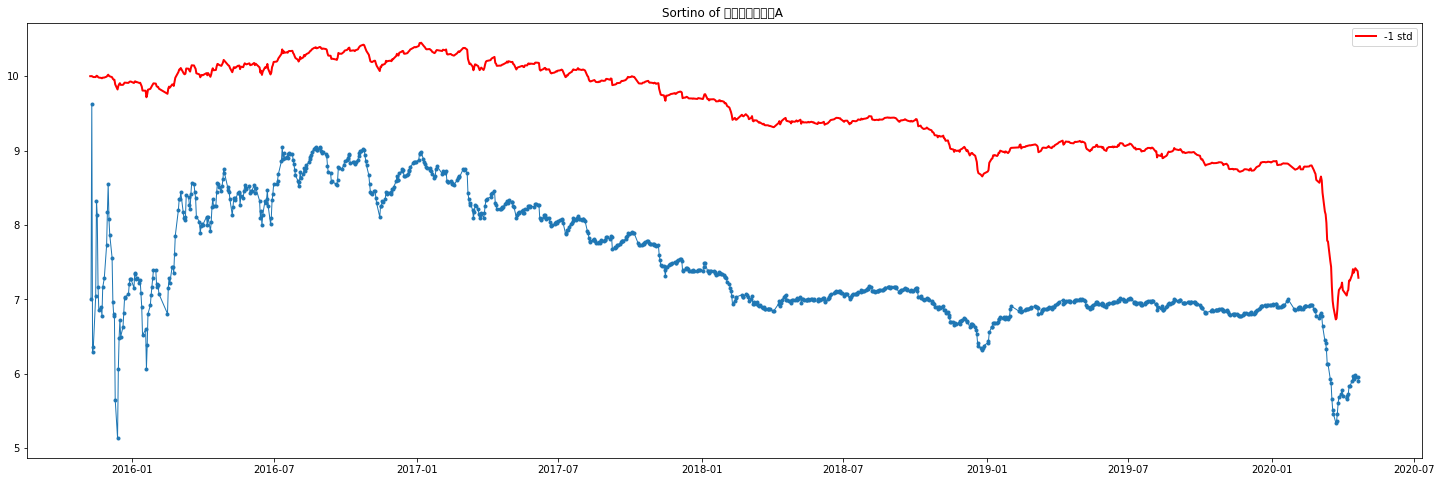

In [5]:
# sortino 散佈圖
x_data = list(df_merge['年月日'])
y_data = list(df_merge['Sortino'])
y2_data = list(df_merge['淨值(元)'])
plt.figure(figsize=(25,8))

for i in range(len(y2_data)):
    y_data[i] = y_data[i] + 8 

line1, = plt.plot(x_data,y_data, marker = '.', linewidth = 1)


'''
for y in range(len(y_data)):
  if y > 1:
      mean = statistics.mean(y_data[0:y+1])
      bound = statistics.mean(y_data[0:y+1]) - statistics.stdev(y_data[0:y+1])
      bound2 = statistics.mean(y_data[0:y+1]) - 0.5*statistics.stdev(y_data[0:y+1])
      df_tmp = df_tmp.append({"mean": mean,
                              "bound1": bound,
                              "bound2": bound2}, ignore_index = True)
  else:
      bound = 0
      bound2 = 0
      mean = statistics.mean(y_data[0:y+1])
      df_tmp = df_tmp.append({"mean": mean,
                              "bound1": bound,
                              "bound2": bound2}, ignore_index = True)
'''

#print(len(x_data)," ",len(bound[]), " ", len(bound2), " ",len(mean))
line2, = plt.plot(x_data, y2_data, c = 'red',linewidth = 2, label = "-1 std")
#line3, = plt.plot(x_data, list(df_tmp['mean']), c = 'yellow',linewidth = 2, label = "mean")
#line4, = plt.plot(x_data, list(df_tmp['bound2']), c = 'violet',linewidth = 2, label = "-0.5 std")
plt.legend(handles = [line1, line2], loc='upper right')
plt.title('Sortino of 野村亞太複合債A ')
plt.show()
# 跟前一年同期相比來決定要不要加碼可能不合適，比同期低才加碼會錯過上升波段、比同期高加碼可能加碼在高點
# 還是用標準差跟中位數試試看

In [0]:
# 因子及變數設定
monthly_money = 6000 # 每月定期定額扣款金額(元)

multiple = 0.9 #之後搭配其他因子調整倍數，用來做加碼閥值設定

In [7]:
# 單純定期定額，不加碼
df_fixed = pd.DataFrame(columns = ["買進日","買入價格","部位淨值","加碼"]) # 存回測結果
start_index = 0 # 測試不同時間開始的報酬率
unit =  monthly_money/df_fund.loc[start_index,'淨值(元)']  # 持有單位,假設從start_index對應的那天開始定期定額
buy_nv = monthly_money # 持有成本

df_fixed = df_fixed.append({"買進日":df_fund.loc[start_index,'年月日'],
                                      "買入價格" : df_fund.loc[start_index,'淨值(元)'],
                                      "部位淨值" : buy_nv, 
                                      "加碼": "x"}, ignore_index=True)

for i,item in df_fund.iterrows():
    if((item['年月日']-df_fund.loc[start_index,'年月日']).days >= 30): # 每"月"定期定額
        unit += monthly_money / item['淨值(元)'] 
        buy_nv = buy_nv + monthly_money
        start_index = i
        df_fixed = df_fixed.append({"買進日": item['年月日'], 
                                              "買入價格" : item['淨值(元)'], 
                                              "部位淨值" : unit*item['淨值(元)'],
                                              "加碼": "x"}, ignore_index=True)

print("end loop")
print(unit*df_fund.loc[len(df_fund)-1,'淨值(元)'])
print(buy_nv)
profit_ret = sell_return(unit*df_fund.loc[len(df_fund)-1,'淨值(元)'], buy_nv,
                         df_fund.loc[len(df_fund)-1,'年月日'], df_fixed.loc[0,'買進日'])
print(profit_ret*100 ,"%")   
#pd.set_option('display.max_rows', None)
df_fixed

end loop
244048.0570536393
318000
-5.223504436462827 %


,買進日,買入價格,部位淨值,加碼
0,2015-11-09,9.9999,6000,x
1,2015-12-09,9.9548,11972.9,x
2,2016-01-08,9.9202,17931.3,x
3,2016-02-16,9.7629,23647,x
4,2016-03-17,10.1108,30489.7,x
5,2016-04-18,10.0834,36407,x
6,2016-05-18,10.1432,42622.9,x
7,2016-06-17,10.0599,48272.9,x
8,2016-07-18,10.3217,55529.2,x
9,2016-08-17,10.3394,61624.4,x


In [8]:
#低檔投資法回測 ：10% 加碼, 淨值若比10天前下跌10%,「隔天」就加碼
df_10_percent = pd.DataFrame(columns = ["買進日","買入價格","部位淨值","加碼"]) # 存回測結果
start_index = 0 # 測試不同時間開始的報酬率
unit =  monthly_money/df_fund.loc[start_index,'淨值(元)']  # 持有單位,假設從start_index對應的那天開始定期定額
buy_nv = monthly_money # 持有成本

df_10_percent = df_10_percent.append({"買進日":df_fund.loc[start_index,'年月日'],
                                      "買入價格" : df_fund.loc[start_index,'淨值(元)'],
                                      "部位淨值" : buy_nv, 
                                      "加碼": "x"}, ignore_index=True)

for i,item in df_fund.iterrows():
    if((item['年月日']-df_fund.loc[start_index,'年月日']).days >= 30): # 每"月"定期定額
        unit += monthly_money / item['淨值(元)'] 
        buy_nv = buy_nv + monthly_money
        start_index = i
        df_10_percent = df_10_percent.append({"買進日": item['年月日'], 
                                              "買入價格" : item['淨值(元)'], 
                                              "部位淨值" : unit*item['淨值(元)'],
                                              "加碼": "x"}, ignore_index=True)
    
    if(i>=10):
        if( item['淨值(元)'] <= 0.9*(df_fund.loc[i-10,'淨值(元)']) ): # 加碼
            buy_date = df_fund.loc[i+1,'年月日']
            unit += monthly_money / item['淨值(元)'] 
            buy_nv = buy_nv + monthly_money
            df_10_percent = df_10_percent.append({"買進日":buy_date, 
                                                  "買入價格" : df_fund.loc[i+1,'淨值(元)'], 
                                                  "部位淨值" : unit*item['淨值(元)'],
                                                  "加碼": "v"}, ignore_index=True)
print("end loop")
print(unit*df_fund.loc[len(df_fund)-1,'淨值(元)'])
print(buy_nv)
profit_ret = sell_return(unit*df_fund.loc[len(df_fund)-1,'淨值(元)'], buy_nv,
                         df_fund.loc[len(df_fund)-1,'年月日'], df_10_percent.loc[0,'買進日'])
print(profit_ret*100 ,"%")   
#pd.set_option('display.max_rows', None)
df_10_percent

end loop
299441.9810032022
372000
-4.381087995670999 %


,買進日,買入價格,部位淨值,加碼
0,2015-11-09,9.9999,6000,x
1,2015-12-09,9.9548,11972.9,x
2,2016-01-08,9.9202,17931.3,x
3,2016-02-16,9.7629,23647,x
4,2016-03-17,10.1108,30489.7,x
5,2016-04-18,10.0834,36407,x
6,2016-05-18,10.1432,42622.9,x
7,2016-06-17,10.0599,48272.9,x
8,2016-07-18,10.3217,55529.2,x
9,2016-08-17,10.3394,61624.4,x


In [10]:
# Sortino 投資法
df_sortino = pd.DataFrame(columns = ["買進日","買入價格","加碼","Sortino"]) # 存持有部位
start_index = 0 # 測試不同時間開始的報酬率
unit =  monthly_money/df_merge.loc[start_index,'淨值(元)']  # 持有單位,假設從start_index對應的那天開始定期定額
buy_nv = monthly_money # 持有成本
nv_list = list(df_merge['淨值(元)'])
df_sortino = df_sortino.append({"買進日": df_merge.loc[start_index,'年月日'],
                                "買入價格" : df_merge.loc[start_index,'淨值(元)'], 
                                "加碼": "x"}, ignore_index=True)

sortino_list = []
sortino_index = 0
s_list = [] 
for i,item in df_merge.iterrows():
    '''
    r = sell_return(item['淨值(元)'], df_sortino.loc[0,'淨值(元)'], item['年月日'], df_sortino.loc[0,'買進日']) # 計算每日跟買進日相比的年化報酬率
    if r < (item['1M']/100):
      s_list.append( (r - item['1M']/100)**2 ) #挑出報酬率 < 必要報酬率的return差值平方，因為sortino只考慮下方標準差
    else:
      s_list.append(0)
    
    #print(i," ",row['年月日']," ",r," ",row['1M'])
    
    if  len(s_list) > 1 and downDeviation(s_list)> 0:
      sortino = calculate_sortino(r, item['1M']/100, downDeviation(s_list))
      #sortino_list[sortino_index] = sortino
      if sortino_index == 9: sortino_index = 0 #只記錄過去10天的 sortino ratio
      else: sortino_index += 1
    '''
    if((item['年月日']-df_merge.loc[start_index,'年月日']).days >= 30): # 定期定額
        unit += monthly_money / item['淨值(元)'] 
        buy_nv += monthly_money
        start_index = i
        df_sortino = df_sortino.append({"買進日": item['年月日'], 
                                      "買入價格" : item['淨值(元)'], 
                                      "加碼": "x",
                                      "Sortino" : item['Sortino'] }, ignore_index=True)
  
    if i > 32:
        #s_mean = statistics.mean(df_merge.loc[start_index,'年月日']) # 過去10天sortino平均值
        #s_stdev = statistics.stdev(sortino_list) # 過去10天sortino標準差
        s_median = statistics.median(list(df_merge['Sortino'])[i-10:i])
        if (1+item['Sortino'] <= 0.9*(1 + s_median))  and (i < (len(df_merge)-1)) and (item['Sortino']<0) and (s_median < 0):  # 加碼          
   
            buy_date = df_merge.loc[i+1,'年月日']
            unit += monthly_money / item['淨值(元)'] 
            buy_nv += monthly_money
            df_sortino = df_sortino.append({"買進日": buy_date, 
                                          "買入價格" : df_merge.loc[i+1,'淨值(元)'], 
                                          "加碼": "v",
                                          "Sortino" : item['Sortino'] }, ignore_index=True)

print(100*sell_return(unit*df_merge.loc[len(df_merge)-1,'淨值(元)'], buy_nv,
                         df_merge.loc[len(df_merge)-1,'年月日'], df_sortino.loc[0,'買進日']),"%")
pd.set_option('display.max_rows', None)
df_sortino

-4.402794944635746 %


,買進日,買入價格,加碼,Sortino
0,2015-11-09,9.9999,x,NaN
1,2015-12-09,9.9548,x,-1.201861
2,2016-01-08,9.9202,x,-0.711040
3,2016-01-12,9.9115,v,-0.779704
4,2016-01-14,9.8617,v,-0.919577
5,2016-01-15,9.8065,v,-1.104059
6,2016-01-19,9.8043,v,-1.484055
7,2016-01-20,9.7162,v,-1.403875
8,2016-01-21,9.7560,v,-1.930345
9,2016-01-22,9.8185,v,-1.615709
